In [1]:
import pandas as pd

**preparing data**

In [2]:
#info about player

master = pd.read_csv("datasets/hockey_data/Master.csv")
master.head() 

,playerID,coachID,hofID,firstName,lastName,nameNote,nameGiven,nameNick,height,weight,...,birthDay,birthCountry,birthState,birthCity,deathYear,deathMon,deathDay,deathCountry,deathState,deathCity
0,aaltoan01,NaN,NaN,Antti,Aalto,NaN,Antti,NaN,73.0,210.0,...,4.0,Finland,NaN,Lappeenranta,NaN,NaN,NaN,NaN,NaN,NaN
1,abbeybr01,NaN,NaN,Bruce,Abbey,NaN,Bruce,NaN,73.0,185.0,...,18.0,Canada,ON,Toronto,NaN,NaN,NaN,NaN,NaN,NaN
2,abbotge01,NaN,NaN,George,Abbott,NaN,George Henry,Preacher,67.0,153.0,...,3.0,Canada,ON,Synenham,NaN,NaN,NaN,NaN,NaN,NaN
3,abbotre01,NaN,NaN,Reg,Abbott,NaN,Reginald Stewart,NaN,71.0,164.0,...,4.0,Canada,MB,Winnipeg,NaN,NaN,NaN,NaN,NaN,NaN
4,abdelju01,NaN,NaN,Justin,Abdelkader,NaN,NaN,NaN,73.0,195.0,...,25.0,USA,MI,Muskegon,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
master.shape

(7761, 31)

In [4]:
master.columns

Index(['playerID', 'coachID', 'hofID', 'firstName', 'lastName', 'nameNote',
       'nameGiven', 'nameNick', 'height', 'weight', 'shootCatch', 'legendsID',
       'ihdbID', 'hrefID', 'firstNHL', 'lastNHL', 'firstWHA', 'lastWHA', 'pos',
       'birthYear', 'birthMon', 'birthDay', 'birthCountry', 'birthState',
       'birthCity', 'deathYear', 'deathMon', 'deathDay', 'deathCountry',
       'deathState', 'deathCity'],
      dtype='object')

In [5]:
#check if there are rows with missing playerID

pd.isnull(master['playerID']).value_counts()

#(master['playerID'].pipe(pd.isnull).value_counts())  alternative

False    7520
True      241
Name: playerID, dtype: int64

In [6]:
master_orig = master.copy()
master = master.dropna(subset= ['playerID'])
master.shape

(7520, 31)

In [7]:
master = master.dropna(subset= ['firstNHL', 'lastNHL'], how= 'all')
#drop rows if both cols are empty
master.shape

(6851, 31)

In [8]:
master = master.loc[master['lastNHL'] >= 1980]
master.shape

(4627, 31)

In [9]:
cols = ['playerID', 'firstName', 'lastName', 'pos', 'birthYear',
        'birthMon', 'birthDay', 'birthCountry', 'birthState', 'birthCity']
master[cols].head()
master.filter(cols).head()

#alt using regular exp

master = master.filter(regex= '(playerID|pos|^birth)|(Name$)')
master.columns

Index(['playerID', 'firstName', 'lastName', 'pos', 'birthYear', 'birthMon',
       'birthDay', 'birthCountry', 'birthState', 'birthCity'],
      dtype='object')

In [10]:
#check memory usage

def mem_mib(df):
    print("{0:.2f} MiB".format(
    df.memory_usage().sum()/ (1024*1024)))
    
mem_mib(master)
mem_mib(master_orig)

0.39 MiB
1.84 MiB


In [11]:
master['pos'].value_counts()

D      1418
C      1037
L       848
R       832
G       463
F        28
L/C       1
Name: pos, dtype: int64

In [12]:
pd.Categorical(master['pos'])

[C, L, L, D, C, ..., R, L, L, C, D]
Length: 4627
Categories (7, object): [C, D, F, G, L, L/C, R]

In [13]:
def make_categorical(df, col):
    df.loc[:, col] = pd.Categorical(df[col])
    
make_categorical(master, 'birthCountry')
make_categorical(master, 'birthState')

mem_mib(master)


0.33 MiB


In [14]:
master.head()

,playerID,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity
0,aaltoan01,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta
4,abdelju01,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon
9,abidra01,Ramzi,Abid,L,1980.0,3.0,24.0,Canada,QC,Montreal
11,abrahth01,Thommy,Abrahamsson,D,1947.0,4.0,12.0,Sweden,NaN,Leksand
14,actonke01,Keith,Acton,C,1958.0,4.0,15.0,Canada,ON,Stouffville


In [15]:
master = master.set_index("playerID")
master.head()

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity
playerID,,,,,,,,,
aaltoan01,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta
abdelju01,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon
abidra01,Ramzi,Abid,L,1980.0,3.0,24.0,Canada,QC,Montreal
abrahth01,Thommy,Abrahamsson,D,1947.0,4.0,12.0,Sweden,NaN,Leksand
actonke01,Keith,Acton,C,1958.0,4.0,15.0,Canada,ON,Stouffville


In [16]:
# seasonal info about players' records

scoring = pd.read_csv("datasets/hockey_data/Scoring.csv")
scoring.shape

(45967, 31)

In [17]:
scoring.head()

,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,...,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
0,aaltoan01,1997,1,ANA,NHL,C,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aaltoan01,1998,1,ANA,NHL,C,73.0,3.0,5.0,8.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,aaltoan01,1999,1,ANA,NHL,C,63.0,7.0,11.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aaltoan01,2000,1,ANA,NHL,C,12.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abbeybr01,1975,1,CIN,WHA,D,17.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
def recent_nhl(df):
    return df[(df['lgID'] == 'NHL') & (df['year'] >= 1980)]

scoring = recent_nhl(scoring)
scoring.shape

(28616, 31)

In [19]:
scoring = scoring.filter(regex = "^(?!(Post|PP|SH)).*")
scoring.columns

Index(['playerID', 'year', 'stint', 'tmID', 'lgID', 'pos', 'GP', 'G', 'A',
       'Pts', 'PIM', '+/-', 'GWG', 'GTG', 'SOG'],
      dtype='object')

In [20]:
scoring = scoring.iloc[:, [0,1,3,6,7,8,9,14]]
scoring.columns

Index(['playerID', 'year', 'tmID', 'GP', 'G', 'A', 'Pts', 'SOG'], dtype='object')

In [21]:
make_categorical(scoring, 'tmID')
scoring.reset_index(drop= True, inplace= True)
scoring.head()

,playerID,year,tmID,GP,G,A,Pts,SOG
0,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [22]:
# team info
teams = pd.read_csv("datasets/hockey_data/Teams.csv")
teams.shape

(1519, 27)

In [23]:
teams.columns

Index(['year', 'lgID', 'tmID', 'franchID', 'confID', 'divID', 'rank',
       'playoff', 'G', 'W', 'L', 'T', 'OTL', 'Pts', 'SoW', 'SoL', 'GF', 'GA',
       'name', 'PIM', 'BenchMinor', 'PPG', 'PPC', 'SHA', 'PKG', 'PKC', 'SHF'],
      dtype='object')

In [24]:
teams = recent_nhl(teams)
teams = teams[['year', 'tmID', 'name']]
teams.head()

,year,tmID,name
727,1980,BOS,Boston Bruins
728,1980,BUF,Buffalo Sabres
729,1980,CAL,Calgary Flames
730,1980,CHI,Chicago Black Hawks
731,1980,COR,Colorado Rockies


In [25]:
teams.nunique()

year    31
tmID    37
name    37
dtype: int64

In [26]:
make_categorical(teams, 'tmID')

In [27]:
teams.shape

(792, 3)

In [28]:
team_splits = pd.read_csv("datasets/hockey_data/TeamSplits.csv")
team_splits.shape

(1519, 43)

In [29]:
team_splits.columns

Index(['year', 'lgID', 'tmID', 'hW', 'hL', 'hT', 'hOTL', 'rW', 'rL', 'rT',
       'rOTL', 'SepW', 'SepL', 'SepT', 'SepOL', 'OctW', 'OctL', 'OctT',
       'OctOL', 'NovW', 'NovL', 'NovT', 'NovOL', 'DecW', 'DecL', 'DecT',
       'DecOL', 'JanW', 'JanL', 'JanT', 'JanOL', 'FebW', 'FebL', 'FebT',
       'FebOL', 'MarW', 'MarL', 'MarT', 'MarOL', 'AprW', 'AprL', 'AprT',
       'AprOL'],
      dtype='object')

In [30]:
team_splits = recent_nhl(team_splits)

In [31]:
team_splits.columns

Index(['year', 'lgID', 'tmID', 'hW', 'hL', 'hT', 'hOTL', 'rW', 'rL', 'rT',
       'rOTL', 'SepW', 'SepL', 'SepT', 'SepOL', 'OctW', 'OctL', 'OctT',
       'OctOL', 'NovW', 'NovL', 'NovT', 'NovOL', 'DecW', 'DecL', 'DecT',
       'DecOL', 'JanW', 'JanL', 'JanT', 'JanOL', 'FebW', 'FebL', 'FebT',
       'FebOL', 'MarW', 'MarL', 'MarT', 'MarOL', 'AprW', 'AprL', 'AprT',
       'AprOL'],
      dtype='object')

In [32]:
drop = team_splits.columns[3:11]
team_splits = team_splits.drop(columns = drop)
team_splits.columns

Index(['year', 'lgID', 'tmID', 'SepW', 'SepL', 'SepT', 'SepOL', 'OctW', 'OctL',
       'OctT', 'OctOL', 'NovW', 'NovL', 'NovT', 'NovOL', 'DecW', 'DecL',
       'DecT', 'DecOL', 'JanW', 'JanL', 'JanT', 'JanOL', 'FebW', 'FebL',
       'FebT', 'FebOL', 'MarW', 'MarL', 'MarT', 'MarOL', 'AprW', 'AprL',
       'AprT', 'AprOL'],
      dtype='object')

In [33]:
team_splits.drop(columns = 'lgID', inplace= True)

In [34]:
make_categorical(team_splits, 'tmID')
team_splits.head()

,year,tmID,SepW,SepL,SepT,SepOL,OctW,OctL,OctT,OctOL,...,FebT,FebOL,MarW,MarL,MarT,MarOL,AprW,AprL,AprT,AprOL
727,1980,BOS,NaN,NaN,NaN,NaN,2.0,7.0,1.0,NaN,...,2.0,NaN,8.0,4.0,3.0,NaN,1.0,2.0,0.0,NaN
728,1980,BUF,NaN,NaN,NaN,NaN,5.0,2.0,2.0,NaN,...,3.0,NaN,8.0,6.0,1.0,NaN,1.0,1.0,1.0,NaN
729,1980,CAL,NaN,NaN,NaN,NaN,5.0,4.0,2.0,NaN,...,1.0,NaN,6.0,6.0,2.0,NaN,2.0,0.0,0.0,NaN
730,1980,CHI,NaN,NaN,NaN,NaN,6.0,4.0,2.0,NaN,...,4.0,NaN,4.0,5.0,4.0,NaN,1.0,1.0,1.0,NaN
731,1980,COR,NaN,NaN,NaN,NaN,4.0,4.0,2.0,NaN,...,2.0,NaN,4.0,9.0,1.0,NaN,0.0,1.0,2.0,NaN


**joining multiple dataframe**

In [35]:
scoring = scoring.reset_index(drop= True)
merged =  pd.merge(master, scoring, left_index= True, right_on = 'playerID', how= 'right', indicator= True)

#index is taken from right table
merged.head()

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,playerID,year,tmID,GP,G,A,Pts,SOG,_merge
0,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0,both
1,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0,both
2,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0,both
3,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0,both
4,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0,both


In [36]:
# since there are no missing values in playerID in both dataframes
merged['_merge'].value_counts()

both          28616
right_only        0
left_only         0
Name: _merge, dtype: int64

In [37]:
scoring2 = scoring.drop(scoring.sample(1000).index)
master2 = master.drop(master.sample(1000).index)
merged2 = pd.merge(master2, scoring2, left_index= True,
                  right_on = 'playerID',
                  how= 'outer',
                  indicator= True)
merged2['_merge'].value_counts()

both          21851
right_only     5765
left_only        17
Name: _merge, dtype: int64

In [38]:
merged2[(merged2['_merge'] == 'left_only') |
      (merged2['_merge'] == 'right_only')].sample(3)

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,playerID,year,tmID,GP,G,A,Pts,SOG,_merge
28265.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,youngwe01,1990.0,PIT,18.0,0.0,1.0,1.0,0.0,right_only
10754.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hrdinja01,2005.0,CBS,75.0,10.0,23.0,33.0,78.0,right_only
25792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,thompna01,2010.0,TBL,79.0,10.0,15.0,25.0,123.0,right_only


In [39]:
merged2[merged2['_merge'].str.endswith("only")].sample(5)

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,playerID,year,tmID,GP,G,A,Pts,SOG,_merge
16312.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mcbeawa01,1987.0,LAK,27.0,0.0,1.0,1.0,21.0,right_only
18694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nilssul01,1980.0,NYR,51.0,14.0,25.0,39.0,80.0,right_only
1184.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,beaurst01,1989.0,WIN,19.0,0.0,0.0,0.0,0.0,right_only
21907.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,robitlu01,2003.0,LAK,80.0,22.0,29.0,51.0,221.0,right_only
10077.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hendrda01,1994.0,TOR,8.0,0.0,1.0,1.0,4.0,right_only


In [40]:
#joins satisfying conditions

pd.merge(master, scoring,
        left_index= True,
        right_on = 'playerID',
        validate = '1:m').head() #many-to-one joins

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,playerID,year,tmID,GP,G,A,Pts,SOG
0,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [41]:
try:
    pd.merge(master, scoring,
            left_index= True,
            right_on = 'playerID',
            validate= "1:1")
except Exception as e:
    print(e)

Merge keys are not unique in right dataset; not a one-to-one merge


In [42]:
teams2 = teams[['tmID', 'name']]
teams2 = teams2.drop_duplicates()
teams2['tmID'].value_counts().head()

CHI    2
MIN    1
HAR    1
FLO    1
EDM    1
Name: tmID, dtype: int64

In [43]:
teams2.loc[teams2['tmID'] == 'CHI']

,tmID,name
730,CHI,Chicago Black Hawks
856,CHI,Chicago Blackhawks


In [44]:
#join using two cols

pd.merge(team_splits, teams,
        left_on = ['tmID', 'year'],
        right_on = ['tmID', 'year']).head(4)
#alt

pd.merge(team_splits, teams,
        on = ['tmID', 'year']).head(4)

,year,tmID,SepW,SepL,SepT,SepOL,OctW,OctL,OctT,OctOL,...,FebOL,MarW,MarL,MarT,MarOL,AprW,AprL,AprT,AprOL,name
0,1980,BOS,NaN,NaN,NaN,NaN,2.0,7.0,1.0,NaN,...,NaN,8.0,4.0,3.0,NaN,1.0,2.0,0.0,NaN,Boston Bruins
1,1980,BUF,NaN,NaN,NaN,NaN,5.0,2.0,2.0,NaN,...,NaN,8.0,6.0,1.0,NaN,1.0,1.0,1.0,NaN,Buffalo Sabres
2,1980,CAL,NaN,NaN,NaN,NaN,5.0,4.0,2.0,NaN,...,NaN,6.0,6.0,2.0,NaN,2.0,0.0,0.0,NaN,Calgary Flames
3,1980,CHI,NaN,NaN,NaN,NaN,6.0,4.0,2.0,NaN,...,NaN,4.0,5.0,4.0,NaN,1.0,1.0,1.0,NaN,Chicago Black Hawks


In [45]:
try:
    pd.merge(team_splits, teams,
            left_on= ['tmID', 'year'],
            right_on = ['year', 'tmID']).head()
except Exception as e:
    print(e)

In [46]:
#if only teamID is used

pd.merge(team_splits, teams,
        on = ["tmID"]).head()

,year_x,tmID,SepW,SepL,SepT,SepOL,OctW,OctL,OctT,OctOL,...,MarW,MarL,MarT,MarOL,AprW,AprL,AprT,AprOL,year_y,name
0,1980,BOS,NaN,NaN,NaN,NaN,2.0,7.0,1.0,NaN,...,8.0,4.0,3.0,NaN,1.0,2.0,0.0,NaN,1980,Boston Bruins
1,1980,BOS,NaN,NaN,NaN,NaN,2.0,7.0,1.0,NaN,...,8.0,4.0,3.0,NaN,1.0,2.0,0.0,NaN,1981,Boston Bruins
2,1980,BOS,NaN,NaN,NaN,NaN,2.0,7.0,1.0,NaN,...,8.0,4.0,3.0,NaN,1.0,2.0,0.0,NaN,1982,Boston Bruins
3,1980,BOS,NaN,NaN,NaN,NaN,2.0,7.0,1.0,NaN,...,8.0,4.0,3.0,NaN,1.0,2.0,0.0,NaN,1983,Boston Bruins
4,1980,BOS,NaN,NaN,NaN,NaN,2.0,7.0,1.0,NaN,...,8.0,4.0,3.0,NaN,1.0,2.0,0.0,NaN,1984,Boston Bruins


In [47]:
pd.merge(team_splits, teams,
        on = ["tmID"]).head().filter(like= 'year')

,year_x,year_y
0,1980,1980
1,1980,1981
2,1980,1982
3,1980,1983
4,1980,1984


In [48]:
pd.merge(team_splits, teams,
        on = ["tmID"],
        suffixes= ["_team_splits", "_teams"]).head().filter(like= 'year')

,year_team_splits,year_teams
0,1980,1980
1,1980,1981
2,1980,1982
3,1980,1983
4,1980,1984


**moving between wide and long data format**

In [49]:
three_years = scoring.loc[(scoring.year > 2000) &
                         (scoring.year < 2004)]
three_years = three_years.drop_duplicates(subset= ["playerID", "year"])

counts = three_years["playerID"].value_counts()
ids = counts[counts == 3].sample(3).index

df3 = three_years.loc[three_years["playerID"].isin(ids)]
df = df3[['playerID', 'year', 'G']]

In [50]:
df.head()

,playerID,year,G
606,aubinse01,2001,8.0
607,aubinse01,2002,4.0
608,aubinse01,2003,10.0
19793,peatst01,2001,2.0
19794,peatst01,2002,1.0


In [51]:
#to wide

pivot = df.pivot(index= 'playerID', columns= 'year', values= 'G')
pivot

year,2001,2002,2003
playerID,,,
aubinse01,8.0,4.0,10.0
peatst01,2.0,1.0,5.0
zubovse01,12.0,11.0,7.0


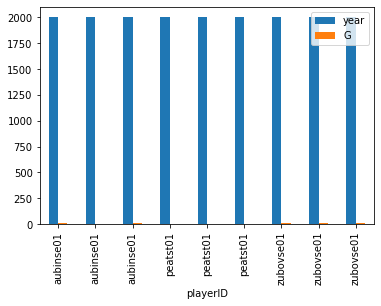

In [52]:
df.set_index("playerID").plot.bar()
#doesn't make sense

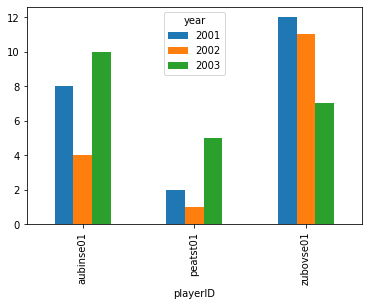

In [53]:
pivot.plot.bar()

In [54]:
#to long format

pivot = pivot.reset_index()
pivot.columns.name = None
pivot

,playerID,2001,2002,2003
0,aubinse01,8.0,4.0,10.0
1,peatst01,2.0,1.0,5.0
2,zubovse01,12.0,11.0,7.0


In [55]:
pivot.melt(id_vars= "playerID")

,playerID,variable,value
0,aubinse01,2001,8.0
1,peatst01,2001,2.0
2,zubovse01,2001,12.0
3,aubinse01,2002,4.0
4,peatst01,2002,1.0
5,zubovse01,2002,11.0
6,aubinse01,2003,10.0
7,peatst01,2003,5.0
8,zubovse01,2003,7.0


In [56]:
pivot.melt(id_vars= "playerID", value_vars= [2001, 2002],
          var_name= "year", value_name= "goals")

,playerID,year,goals
0,aubinse01,2001,8.0
1,peatst01,2001,2.0
2,zubovse01,2001,12.0
3,aubinse01,2002,4.0
4,peatst01,2002,1.0
5,zubovse01,2002,11.0


In [57]:
larger_df3 = df3[["playerID", "tmID", "year", "G"]]
larger_df3

try:
    larger_df3.pivot(index = ["playerID", "tmID"],
                    columns = "year",
                    values = "G")
except Exception as e:
    print(e)

Length of passed values is 9, index implies 2.


**multi-level incexing**

In [58]:
mi = scoring.set_index(['playerID', 'year'])
mi.head()

tmID    GP    G     A   Pts    SOG
playerID  year                                   
aaltoan01 1997  ANA   3.0  0.0   0.0   0.0    1.0
          1998  ANA  73.0  3.0   5.0   8.0   61.0
          1999  ANA  63.0  7.0  11.0  18.0  102.0
          2000  ANA  12.0  1.0   1.0   2.0   18.0
abdelju01 2007  DET   2.0  0.0   0.0   0.0    6.0

In [59]:
len(mi.index.levels)

#alt

mi.index.nlevels

2

In [60]:
mi.index.levels[1]

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011],
           dtype='int64', name='year')

In [61]:
mi.index.levels[0]

Index(['aaltoan01', 'abdelju01', 'abidra01', 'abrahth01', 'actonke01',
       'adamlu01', 'adamru01', 'adamsbr01', 'adamscr01', 'adamsgr01',
       ...
       'zolniha01', 'zombori01', 'zubaran01', 'zubovil01', 'zubovse01',
       'zubruda01', 'zuccama01', 'zuckeja01', 'zukemi01', 'zyuzian01'],
      dtype='object', name='playerID', length=4627)

In [62]:
#grouping using multi-index

mi.groupby(level= "year")['G'].max().head()

year
1980    68.0
1981    92.0
1982    71.0
1983    87.0
1984    73.0
Name: G, dtype: float64

In [63]:
mi.groupby(level= "year")['G'].idxmax().head()

year
1980    (bossymi01, 1980)
1981    (gretzwa01, 1981)
1982    (gretzwa01, 1982)
1983    (gretzwa01, 1983)
1984    (gretzwa01, 1984)
Name: G, dtype: object

In [64]:
mi.loc[mi.groupby(level= "year")['G'].idxmax()].head()

tmID    GP     G      A    Pts    SOG
playerID  year                                      
bossymi01 1980  NYI  79.0  68.0   51.0  119.0  315.0
gretzwa01 1981  EDM  80.0  92.0  120.0  212.0  369.0
          1982  EDM  80.0  71.0  125.0  196.0  348.0
          1983  EDM  74.0  87.0  118.0  205.0  324.0
          1984  EDM  80.0  73.0  135.0  208.0  358.0

In [65]:
#selecting elements

mi.loc[('gretzwa01', 1982), :]

,,tmID,GP,G,A,Pts,SOG
playerID,year,,,,,,
gretzwa01,1982,EDM,80.0,71.0,125.0,196.0,348.0


In [66]:
#slicing

idx = pd.IndexSlice
mi2 = mi.sort_index()
mi.index.is_lexsorted() #if lexicographically sorted

True

In [67]:
sli1 = mi.loc[idx[:, 1997:2000], :]
sli1.head()

tmID    GP    G     A   Pts    SOG
playerID  year                                   
aaltoan01 1997  ANA   3.0  0.0   0.0   0.0    1.0
          1998  ANA  73.0  3.0   5.0   8.0   61.0
          1999  ANA  63.0  7.0  11.0  18.0  102.0
          2000  ANA  12.0  1.0   1.0   2.0   18.0
adamsbr01 1999  ATL   2.0  0.0   0.0   0.0    1.0

In [68]:
sli2 = mi.loc[idx['aaltoan01' : 'adamscr01', 1997:2004:2], :]
sli2.head()

tmID    GP    G     A   Pts    SOG
playerID  year                                   
aaltoan01 1997  ANA   3.0  0.0   0.0   0.0    1.0
          1999  ANA  63.0  7.0  11.0  18.0  102.0
abidra01  2003  PIT  16.0  3.0   2.0   5.0   35.0
adamsbr01 1999  ATL   2.0  0.0   0.0   0.0    1.0
adamscr01 2001  CAR  33.0  0.0   1.0   1.0   17.0

In [69]:
locs = mi.index.get_locs((
idx['aaltoan01' : 'adamscr01', 1997:2000]
))
locs

array([ 0,  1,  2,  3, 36, 37, 38])

In [70]:
sli2 = mi.iloc[locs, :]
sli2.head()

tmID    GP    G     A   Pts    SOG
playerID  year                                   
aaltoan01 1997  ANA   3.0  0.0   0.0   0.0    1.0
          1998  ANA  73.0  3.0   5.0   8.0   61.0
          1999  ANA  63.0  7.0  11.0  18.0  102.0
          2000  ANA  12.0  1.0   1.0   2.0   18.0
adamsbr01 1999  ATL   2.0  0.0   0.0   0.0    1.0

In [71]:
mi = mi.sort_index(level = 'year')
mi.head()

,,tmID,GP,G,A,Pts,SOG
playerID,year,,,,,,
abrahth01,1980,HAR,32.0,6.0,11.0,17.0,66.0
actonke01,1980,MTL,61.0,15.0,24.0,39.0,101.0
adamsgr01,1980,PHI,6.0,3.0,0.0,3.0,6.0
alleyst01,1980,HAR,8.0,2.0,2.0,4.0,10.0
allismi01,1980,NYR,75.0,26.0,38.0,64.0,122.0


In [72]:
swapped = mi.swaplevel()
swapped.head()

tmID    GP     G     A   Pts    SOG
year playerID                                     
1980 abrahth01  HAR  32.0   6.0  11.0  17.0   66.0
     actonke01  MTL  61.0  15.0  24.0  39.0  101.0
     adamsgr01  PHI   6.0   3.0   0.0   3.0    6.0
     alleyst01  HAR   8.0   2.0   2.0   4.0   10.0
     allismi01  NYR  75.0  26.0  38.0  64.0  122.0

**multi-level indexing with long and wide formats**

In [73]:
te_sp = pd.merge(team_splits, teams,
        on = ["tmID"]).head()
te_sp = te_sp.drop(columns= ['tmID', 'year_y'])
te_sp = te_sp.set_index(['year_x', 'name'])
te_sp.head()

SepW  SepL  SepT  SepOL  OctW  OctL  OctT  OctOL  NovW  \
year_x name                                                                    
1980   Boston Bruins   NaN   NaN   NaN    NaN   2.0   7.0   1.0    NaN   5.0   
       Boston Bruins   NaN   NaN   NaN    NaN   2.0   7.0   1.0    NaN   5.0   
       Boston Bruins   NaN   NaN   NaN    NaN   2.0   7.0   1.0    NaN   5.0   
       Boston Bruins   NaN   NaN   NaN    NaN   2.0   7.0   1.0    NaN   5.0   
       Boston Bruins   NaN   NaN   NaN    NaN   2.0   7.0   1.0    NaN   5.0   

                      NovL  ...  FebT  FebOL  MarW  MarL  MarT  MarOL  AprW  \
year_x name                 ...                                               
1980   Boston Bruins   3.0  ...   2.0    NaN   8.0   4.0   3.0    NaN   1.0   
       Boston Bruins   3.0  ...   2.0    NaN   8.0   4.0   3.0    NaN   1.0   
       Boston Bruins   3.0  ...   2.0    NaN   8.0   4.0   3.0    NaN   1.0   
       Boston Bruins   3.0  ...   2.0    NaN   8.0   4.0   3.0    NaN   1.0   
       Boston Bruins   3.0  ...   2.0    NaN   8.0   4.0   3.0    NaN   1.0   

                      AprL  AprT  AprOL  
year_x name                              
1980   Boston Bruins   2.0   0.0    NaN  
       Boston Bruins   2.0   0.0    NaN  
       Boston Bruins   2.0   0.0    NaN  
       Boston Bruins   2.0   0.0    NaN  
       Boston Bruins   2.0   0.0    NaN  

[5 rows x 32 columns]

In [74]:
months = te_sp.columns.map(lambda x:x[:3])
metrics = te_sp.columns.map(lambda x:x[3:])
print(months)
print(metrics)

Index(['Sep', 'Sep', 'Sep', 'Sep', 'Oct', 'Oct', 'Oct', 'Oct', 'Nov', 'Nov',
       'Nov', 'Nov', 'Dec', 'Dec', 'Dec', 'Dec', 'Jan', 'Jan', 'Jan', 'Jan',
       'Feb', 'Feb', 'Feb', 'Feb', 'Mar', 'Mar', 'Mar', 'Mar', 'Apr', 'Apr',
       'Apr', 'Apr'],
      dtype='object')
Index(['W', 'L', 'T', 'OL', 'W', 'L', 'T', 'OL', 'W', 'L', 'T', 'OL', 'W', 'L',
       'T', 'OL', 'W', 'L', 'T', 'OL', 'W', 'L', 'T', 'OL', 'W', 'L', 'T',
       'OL', 'W', 'L', 'T', 'OL'],
      dtype='object')


In [75]:
midx = pd.MultiIndex.from_arrays([months, metrics])
midx

MultiIndex([('Sep',  'W'),
            ('Sep',  'L'),
            ('Sep',  'T'),
            ('Sep', 'OL'),
            ('Oct',  'W'),
            ('Oct',  'L'),
            ('Oct',  'T'),
            ('Oct', 'OL'),
            ('Nov',  'W'),
            ('Nov',  'L'),
            ('Nov',  'T'),
            ('Nov', 'OL'),
            ('Dec',  'W'),
            ('Dec',  'L'),
            ('Dec',  'T'),
            ('Dec', 'OL'),
            ('Jan',  'W'),
            ('Jan',  'L'),
            ('Jan',  'T'),
            ('Jan', 'OL'),
            ('Feb',  'W'),
            ('Feb',  'L'),
            ('Feb',  'T'),
            ('Feb', 'OL'),
            ('Mar',  'W'),
            ('Mar',  'L'),
            ('Mar',  'T'),
            ('Mar', 'OL'),
            ('Apr',  'W'),
            ('Apr',  'L'),
            ('Apr',  'T'),
            ('Apr', 'OL')],
           )

In [76]:
te_sp.columns = midx
te_sp.head()
#wide format

Sep              Oct                Nov       ...  Feb  \
                       W   L   T  OL    W    L    T  OL    W    L  ...    T   
year_x name                                                        ...        
1980   Boston Bruins NaN NaN NaN NaN  2.0  7.0  1.0 NaN  5.0  3.0  ...  2.0   
       Boston Bruins NaN NaN NaN NaN  2.0  7.0  1.0 NaN  5.0  3.0  ...  2.0   
       Boston Bruins NaN NaN NaN NaN  2.0  7.0  1.0 NaN  5.0  3.0  ...  2.0   
       Boston Bruins NaN NaN NaN NaN  2.0  7.0  1.0 NaN  5.0  3.0  ...  2.0   
       Boston Bruins NaN NaN NaN NaN  2.0  7.0  1.0 NaN  5.0  3.0  ...  2.0   

                          Mar                Apr                
                      OL    W    L    T  OL    W    L    T  OL  
year_x name                                                     
1980   Boston Bruins NaN  8.0  4.0  3.0 NaN  1.0  2.0  0.0 NaN  
       Boston Bruins NaN  8.0  4.0  3.0 NaN  1.0  2.0  0.0 NaN  
       Boston Bruins NaN  8.0  4.0  3.0 NaN  1.0  2.0  0.0 NaN  
       Boston Bruins NaN  8.0  4.0  3.0 NaN  1.0  2.0  0.0 NaN  
       Boston Bruins NaN  8.0  4.0  3.0 NaN  1.0  2.0  0.0 NaN  

[5 rows x 32 columns]

In [77]:
te_sp = te_sp.stack(level= 0)
te_sp.head(10)

L  OL    T    W
year_x name                                
1980   Boston Bruins Apr  2.0 NaN  0.0  1.0
                     Dec  6.0 NaN  1.0  6.0
                     Feb  4.0 NaN  2.0  6.0
                     Jan  4.0 NaN  1.0  9.0
                     Mar  4.0 NaN  3.0  8.0
                     Nov  3.0 NaN  5.0  5.0
                     Oct  7.0 NaN  1.0  2.0
                     Apr  2.0 NaN  0.0  1.0
                     Dec  6.0 NaN  1.0  6.0
                     Feb  4.0 NaN  2.0  6.0

In [78]:
te_sp = te_sp.swaplevel(1,2)
te_sp.head()

L  OL    T    W
year_x     name                            
1980   Apr Boston Bruins  2.0 NaN  0.0  1.0
       Dec Boston Bruins  6.0 NaN  1.0  6.0
       Feb Boston Bruins  4.0 NaN  2.0  6.0
       Jan Boston Bruins  4.0 NaN  1.0  9.0
       Mar Boston Bruins  4.0 NaN  3.0  8.0

In [79]:
te_sp = te_sp.reorder_levels([2,0,1])
te_sp.head()

L  OL    T    W
name          year_x                       
Boston Bruins 1980   Apr  2.0 NaN  0.0  1.0
                     Dec  6.0 NaN  1.0  6.0
                     Feb  4.0 NaN  2.0  6.0
                     Jan  4.0 NaN  1.0  9.0
                     Mar  4.0 NaN  3.0  8.0

In [80]:
te_sp.index.set_names('month', level=2, inplace= True)
te_sp.head()

L  OL    T    W
name          year_x month                   
Boston Bruins 1980   Apr    2.0 NaN  0.0  1.0
                     Dec    6.0 NaN  1.0  6.0
                     Feb    4.0 NaN  2.0  6.0
                     Jan    4.0 NaN  1.0  9.0
                     Mar    4.0 NaN  3.0  8.0

In [81]:
te_sp.groupby(level = ['name', 'year_x']).sum().head()

,,L,OL,T,W
name,year_x,,,,
Boston Bruins,1980,150.0,0.0,65.0,185.0


In [82]:
#error
#te_sp.unstack(level = ['year_x', 'month']).head()

**handling time series data**

In [83]:
master.head()

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity
playerID,,,,,,,,,
aaltoan01,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta
abdelju01,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon
abidra01,Ramzi,Abid,L,1980.0,3.0,24.0,Canada,QC,Montreal
abrahth01,Thommy,Abrahamsson,D,1947.0,4.0,12.0,Sweden,NaN,Leksand
actonke01,Keith,Acton,C,1958.0,4.0,15.0,Canada,ON,Stouffville


In [84]:
#assign creates new columns

master = master.assign(birthDate = pd.to_datetime({
    'year': master.birthYear,
    'month': master.birthMon,
    'day': master.birthDay
}))
master = master.drop(columns = ['birthYear', 'birthMon', 'birthDay'])
master.head()

,firstName,lastName,pos,birthCountry,birthState,birthCity,birthDate
playerID,,,,,,,
aaltoan01,Antti,Aalto,C,Finland,NaN,Lappeenranta,1975-03-04
abdelju01,Justin,Abdelkader,L,USA,MI,Muskegon,1987-02-25
abidra01,Ramzi,Abid,L,Canada,QC,Montreal,1980-03-24
abrahth01,Thommy,Abrahamsson,D,Sweden,NaN,Leksand,1947-04-12
actonke01,Keith,Acton,C,Canada,ON,Stouffville,1958-04-15


In [85]:
master.birthDate[0]

Timestamp('1975-03-04 00:00:00')

In [86]:
ts = master.birthDate[0]
print(u"{}, {} {} {}".format(ts.day_name(),
                            ts.day,
                            ts.month_name(),
                            ts.year))

Tuesday, 4 March 1975


In [87]:
tsz = ts.tz_localize("Asia/Kathmandu")
tsz

Timestamp('1975-03-04 00:00:00+0530', tz='Asia/Kathmandu')

In [88]:
tsz.tz_convert('Europe/London')

Timestamp('1975-03-03 18:30:00+0000', tz='Europe/London')

In [89]:
#convert to strings

strings = master.birthDate.dt.strftime("%Y-%d-%Y-%a")
strings.head()

playerID
aaltoan01    1975-04-1975-Tue
abdelju01    1987-25-1987-Wed
abidra01     1980-24-1980-Mon
abrahth01    1947-12-1947-Sat
actonke01    1958-15-1958-Tue
Name: birthDate, dtype: object

In [90]:
#alt
strings = master.birthDate.dt.strftime("%Y-%m-%d")
dates = pd.to_datetime(strings)
dates.head()

playerID
aaltoan01   1975-03-04
abdelju01   1987-02-25
abidra01    1980-03-24
abrahth01   1947-04-12
actonke01   1958-04-15
Name: birthDate, dtype: datetime64[ns]

In [91]:
#for unknown string formats

strings = strings.str.replace("-", "xx")
strings.head()

playerID
aaltoan01    1975xx03xx04
abdelju01    1987xx02xx25
abidra01     1980xx03xx24
abrahth01    1947xx04xx12
actonke01    1958xx04xx15
Name: birthDate, dtype: object

In [92]:
try:
    pd.to_datetime(strings)
except Exception as e:
    print(e)

Unknown string format: 1975xx03xx04


In [93]:
parsed = pd.to_datetime(strings, format= "%Yxx%mxx%d")
parsed.head()

playerID
aaltoan01   1975-03-04
abdelju01   1987-02-25
abidra01    1980-03-24
abrahth01   1947-04-12
actonke01   1958-04-15
Name: birthDate, dtype: datetime64[ns]

In [94]:
strings_error = strings.copy()
strings_error.iloc[34] = "xx123"
try:
    pd.to_datetime(strings_error, format= "%Yxx%mxx%d")
except Exception as e:
    print(e)

parsed = pd.to_datetime(strings_error, 
                        format= "%Yxx%mxx%d",
                        errors = "coerce")
parsed.iloc[34]
#not a time(NaT)

time data 'xx123' does not match format '%Yxx%mxx%d' (match)


NaT

In [95]:
parsed = pd.to_datetime(strings_error, 
                        format= "%Yxx%mxx%d",
                        errors = "ignore")
parsed.head()

playerID
aaltoan01    1975xx03xx04
abdelju01    1987xx02xx25
abidra01     1980xx03xx24
abrahth01    1947xx04xx12
actonke01    1958xx04xx15
Name: birthDate, dtype: object

In [96]:
birth_dates = pd.Series(master.index, index= master.birthDate)
birth_dates.head()

birthDate
1975-03-04    aaltoan01
1987-02-25    abdelju01
1980-03-24     abidra01
1947-04-12    abrahth01
1958-04-15    actonke01
Name: playerID, dtype: object

In [97]:
birth_dates.index

DatetimeIndex(['1975-03-04', '1987-02-25', '1980-03-24', '1947-04-12',
               '1958-04-15', '1990-06-18', '1961-05-05', '1977-03-20',
               '1977-04-26', '1960-05-31',
               ...
               '1987-09-01', '1963-05-08', '1987-03-03', '1987-02-14',
               '1970-07-22', '1978-06-16', '1987-09-01', '1992-01-16',
               '1954-04-16', '1978-01-21'],
              dtype='datetime64[ns]', name='birthDate', length=4627, freq=None)

In [98]:
birth_dates = birth_dates.sort_index()
birth_dates.head()

birthDate
1940-01-27    harpete01
1940-03-22     keonda01
1940-10-03    ratelje01
1942-02-20    esposph01
1943-04-23    esposto01
Name: playerID, dtype: object

In [99]:
born_1980 = birth_dates['1980']
born_1980.head()

birthDate
1980-01-02    zalesmi01
1980-01-10    stanara01
1980-01-13    bouckty01
1980-01-13     ruppmi01
1980-01-15    papinju01
Name: playerID, dtype: object

In [100]:
birth_dates['1980-07']

birthDate
1980-07-03    miettan01
1980-07-05    huntetr01
1980-07-08    chouier01
1980-07-15    cheecjo01
1980-07-17    millery01
1980-07-19    tanabda01
1980-07-20    arsende01
1980-07-22    kalindm01
1980-07-24    jillsje01
1980-07-24    printda01
1980-07-31    fischji01
Name: playerID, dtype: object

In [101]:
birth_dates['1980-07-20': '1980-07-31']

birthDate
1980-07-20    arsende01
1980-07-22    kalindm01
1980-07-24    jillsje01
1980-07-24    printda01
1980-07-31    fischji01
Name: playerID, dtype: object

In [102]:
#timedelta

diff = birth_dates.index[1] - birth_dates.index[0]
diff

Timedelta('55 days 00:00:00')

In [103]:
birth_dates.index - birth_dates.index[0]

TimedeltaIndex([    '0 days',    '55 days',   '250 days',   '755 days',
                 '1182 days',  '1508 days',  '1808 days',  '1829 days',
                 '1887 days',  '1975 days',
                ...
                '19179 days', '19218 days', '19245 days', '19267 days',
                '19283 days', '19294 days', '19308 days', '19406 days',
                '19434 days', '19440 days'],
               dtype='timedelta64[ns]', name='birthDate', length=4627, freq=None)

In [104]:
diff.components

Components(days=55, hours=0, minutes=0, seconds=0, milliseconds=0, microseconds=0, nanoseconds=0)

In [105]:
diff = diff + '5H' - '10M'
diff

Timedelta('55 days 04:50:00')

In [106]:
diff.round('10D')

Timedelta('60 days 00:00:00')

In [107]:
diff.round("1H")

Timedelta('55 days 05:00:00')

In [108]:
#period

birth_dates = birth_dates.to_period(freq= 'D')
birth_dates.index

PeriodIndex(['1940-01-27', '1940-03-22', '1940-10-03', '1942-02-20',
             '1943-04-23', '1944-03-14', '1945-01-08', '1945-01-29',
             '1945-03-28', '1945-06-24',
             ...
             '1992-07-31', '1992-09-08', '1992-10-05', '1992-10-27',
             '1992-11-12', '1992-11-23', '1992-12-07', '1993-03-15',
             '1993-04-12', '1993-04-18'],
            dtype='period[D]', name='birthDate', length=4627, freq='D')

In [109]:
birth_dates.index[0]

Period('1940-01-27', 'D')

In [110]:
start = birth_dates.index[0].start_time
start

Timestamp('1940-01-27 00:00:00')

In [111]:
end = birth_dates.index[0].end_time
end

Timestamp('1940-01-27 23:59:59.999999999')

In [112]:
#frequency conversion and various aggregations

birth_dates.resample('1M')

In [113]:
birth_dates.resample('1M').count().head()

birthDate
1940-01    1
1940-02    0
1940-03    1
1940-04    0
1940-05    0
Freq: M, Name: playerID, dtype: int64

In [114]:
birth_dates.resample('2M').count().head()

birthDate
1940-01    1
1940-03    1
1940-05    0
1940-07    0
1940-09    1
Freq: 2M, Name: playerID, dtype: int64

In [115]:
birth_dates.resample('1Q').count().head()

birthDate
1940Q1    2
1940Q2    0
1940Q3    0
1940Q4    1
1941Q1    0
Freq: Q-DEC, Name: playerID, dtype: int64

In [116]:
birth_dates.resample('W').count().head()

birthDate
1940-01-22/1940-01-28    1
1940-01-29/1940-02-04    0
1940-02-05/1940-02-11    0
1940-02-12/1940-02-18    0
1940-02-19/1940-02-25    0
Freq: W-SUN, Name: playerID, dtype: int64

In [117]:
from pandas.tseries.offsets import BDay

p = birth_dates.index[2]
print(p.to_timestamp())
print(p.to_timestamp() + BDay(7)) #business day

1940-10-03 00:00:00
1940-10-14 00:00:00


In [118]:
#shift index by arbitary int
birth_dates.head()

birthDate
1940-01-27    harpete01
1940-03-22     keonda01
1940-10-03    ratelje01
1942-02-20    esposph01
1943-04-23    esposto01
Freq: D, Name: playerID, dtype: object

In [119]:
birth_dates.shift(1, freq = 'D').head()

birthDate
1940-01-28    harpete01
1940-03-23     keonda01
1940-10-04    ratelje01
1942-02-21    esposph01
1943-04-24    esposto01
Freq: D, Name: playerID, dtype: object

In [120]:
te_sp = te_sp.reset_index()
te_sp.head()

,name,year_x,month,L,OL,T,W
0,Boston Bruins,1980,Apr,2.0,NaN,0.0,1.0
1,Boston Bruins,1980,Dec,6.0,NaN,1.0,6.0
2,Boston Bruins,1980,Feb,4.0,NaN,2.0,6.0
3,Boston Bruins,1980,Jan,4.0,NaN,1.0,9.0
4,Boston Bruins,1980,Mar,4.0,NaN,3.0,8.0


In [121]:
string_date = te_sp.apply(lambda x:
                         pd.Period("{}-{}".format(x.year_x, x.month)), axis=1)
string_date[0]

Period('1980-04', 'M')

In [122]:
te_sp = te_sp.assign(month = string_date)
te_sp = te_sp.drop('year_x', axis= 1)
te_sp.head()

,name,month,L,OL,T,W
0,Boston Bruins,1980-04,2.0,NaN,0.0,1.0
1,Boston Bruins,1980-12,6.0,NaN,1.0,6.0
2,Boston Bruins,1980-02,4.0,NaN,2.0,6.0
3,Boston Bruins,1980-01,4.0,NaN,1.0,9.0
4,Boston Bruins,1980-03,4.0,NaN,3.0,8.0


In [124]:
te_sp = te_sp.set_index(["month"])
te_sp.head()

,name,L,OL,T,W
month,,,,,
1980-04,Boston Bruins,2.0,NaN,0.0,1.0
1980-12,Boston Bruins,6.0,NaN,1.0,6.0
1980-02,Boston Bruins,4.0,NaN,2.0,6.0
1980-01,Boston Bruins,4.0,NaN,1.0,9.0
1980-03,Boston Bruins,4.0,NaN,3.0,8.0


In [125]:
quarter_sums = te_sp.groupby("name").resample("Q").sum()
quarter_sums.head()

L   OL     T      W
name          month                         
Boston Bruins 1980Q1  60.0  0.0  30.0  115.0
              1980Q2  10.0  0.0   0.0    5.0
              1980Q3   0.0  0.0   0.0    0.0
              1980Q4  80.0  0.0  35.0   65.0

In [126]:
quarter_sums = te_sp.groupby("name").resample("Q").mean()
quarter_sums.head()

L  OL         T         W
name          month                                   
Boston Bruins 1980Q1  4.000000 NaN  2.000000  7.666667
              1980Q2  2.000000 NaN  0.000000  1.000000
              1980Q3       NaN NaN       NaN       NaN
              1980Q4  5.333333 NaN  2.333333  4.333333

**windows**

*types: rolling and expanding*

*rolling window move row by row and perform aggregations*

*expanding window--- the beginning row stays same but end row is moving forward and perform some aggregations. eg. cumulative frequency*

In [127]:
wayne = mi.loc["gretzwa01"]
wayne

,tmID,GP,G,A,Pts,SOG
year,,,,,,
1980,EDM,80.0,55.0,109.0,164.0,261.0
1981,EDM,80.0,92.0,120.0,212.0,369.0
1982,EDM,80.0,71.0,125.0,196.0,348.0
1983,EDM,74.0,87.0,118.0,205.0,324.0
1984,EDM,80.0,73.0,135.0,208.0,358.0
1985,EDM,80.0,52.0,163.0,215.0,350.0
1986,EDM,79.0,62.0,121.0,183.0,288.0
1987,EDM,64.0,40.0,109.0,149.0,211.0
1988,LAK,78.0,54.0,114.0,168.0,303.0


In [128]:
sums = wayne.groupby(level= 0)['G', 'A'].sum()
sums

/home/usha/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,G,A
year,,
1980,55.0,109.0
1981,92.0,120.0
1982,71.0,125.0
1983,87.0,118.0
1984,73.0,135.0
1985,52.0,163.0
1986,62.0,121.0
1987,40.0,109.0
1988,54.0,114.0


In [129]:
#rolling mean

mean = sums.rolling(3)["G"].mean()
mean.head(10)

year
1980          NaN
1981          NaN
1982    72.666667
1983    83.333333
1984    77.000000
1985    70.666667
1986    62.333333
1987    51.333333
1988    52.000000
1989    44.666667
Name: G, dtype: float64

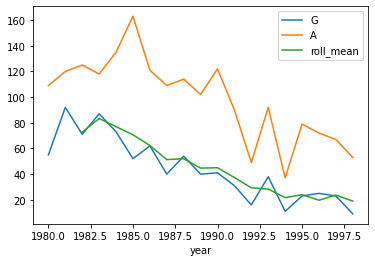

In [130]:
%matplotlib inline
sums.assign(roll_mean = mean).plot()

In [131]:
mean = sums.rolling(3, min_periods= 2)["G"].mean()
mean.head(10)

year
1980          NaN
1981    73.500000
1982    72.666667
1983    83.333333
1984    77.000000
1985    70.666667
1986    62.333333
1987    51.333333
1988    52.000000
1989    44.666667
Name: G, dtype: float64

In [132]:
means = sums.rolling(3, center=True).mean()
means.head(10)

,G,A
year,,
1980,NaN,NaN
1981,72.666667,118.000000
1982,83.333333,121.000000
1983,77.000000,126.000000
1984,70.666667,138.666667
1985,62.333333,139.666667
1986,51.333333,131.000000
1987,52.000000,114.666667
1988,44.666667,108.333333


In [133]:
triang_goals_sum = sums['G'].rolling(3,
                                   win_type = 'triang',
                                   center= True).sum()
sums.assign(triang = triang_goals_sum).head()

,G,A,triang
year,,,
1980,55.0,109.0,NaN
1981,92.0,120.0,155.0
1982,71.0,125.0,160.5
1983,87.0,118.0,159.0
1984,73.0,135.0,142.5


In [134]:
quarter_counts = birth_dates.resample('Q').count()
quarter_counts.rolling(4).sum().head(10)

birthDate
1940Q1    NaN
1940Q2    NaN
1940Q3    NaN
1940Q4    3.0
1941Q1    1.0
1941Q2    1.0
1941Q3    1.0
1941Q4    0.0
1942Q1    1.0
1942Q2    1.0
Freq: Q-DEC, Name: playerID, dtype: float64

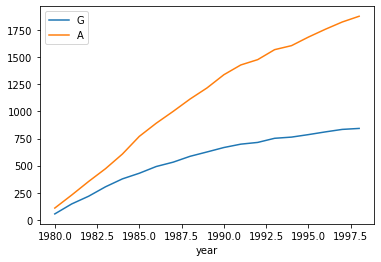

In [135]:
#expanding window

sums.expanding().sum().plot()

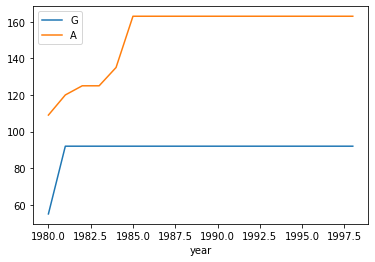

In [136]:
sums.expanding().max().plot()

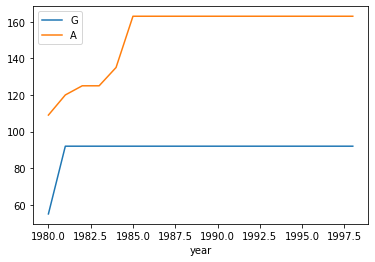

In [137]:
#alt
sums.cummax().plot()

In [138]:
#for each season what percentage of total career goals were scored by that season

total = sums.sum()
total

G     843.0
A    1877.0
dtype: float64

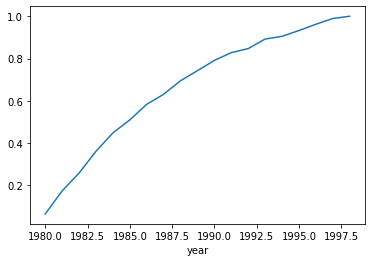

In [139]:
total_part = sums['G'].expanding().aggregate(lambda x:
                                            x.sum()/total['G'])
total_part.plot()